In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd/content/drive/Shareddrives/MobileNetV2

/content/drive/Shareddrives/MobileNetV2


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

In [ ]:
# Set the batch size and image size
batch_size = 32
img_size = (299, 299)

In [ ]:
# Define your custom dataset directory
train_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/train'
validation_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/validation'
test_dir = '/content/drive/Shareddrives/MobileNetV2/Dataset_withval/test'

In [ ]:
# Create the data generators for train/validation/test sets
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 840 images belonging to 2 classes.
Found 180 images belonging to 2 classes.
Found 180 images belonging to 2 classes.


In [ ]:
# Load the pre-trained Xception model without the top layer
xception = Xception(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

83683744/83683744 [==============================] - 0s 0us/step


In [ ]:
# Add a global average pooling layer and a dense layer for the custom classification task
x = GlobalAveragePooling2D()(xception.output)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

In [ ]:
# Create the custom model
model = Model(inputs=xception.input, outputs=predictions)

In [ ]:
# Compile the model with a suitable optimizer and loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

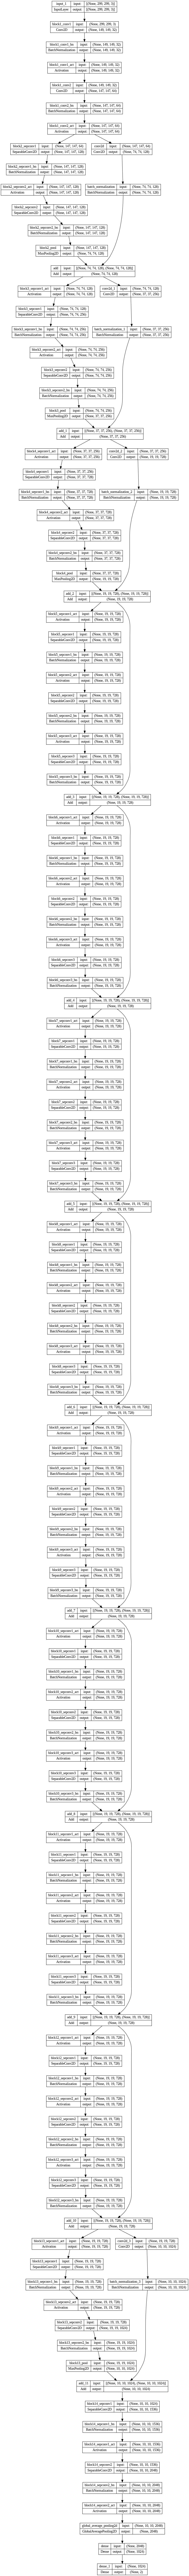

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 17.3 MB/s eta 0:00:00


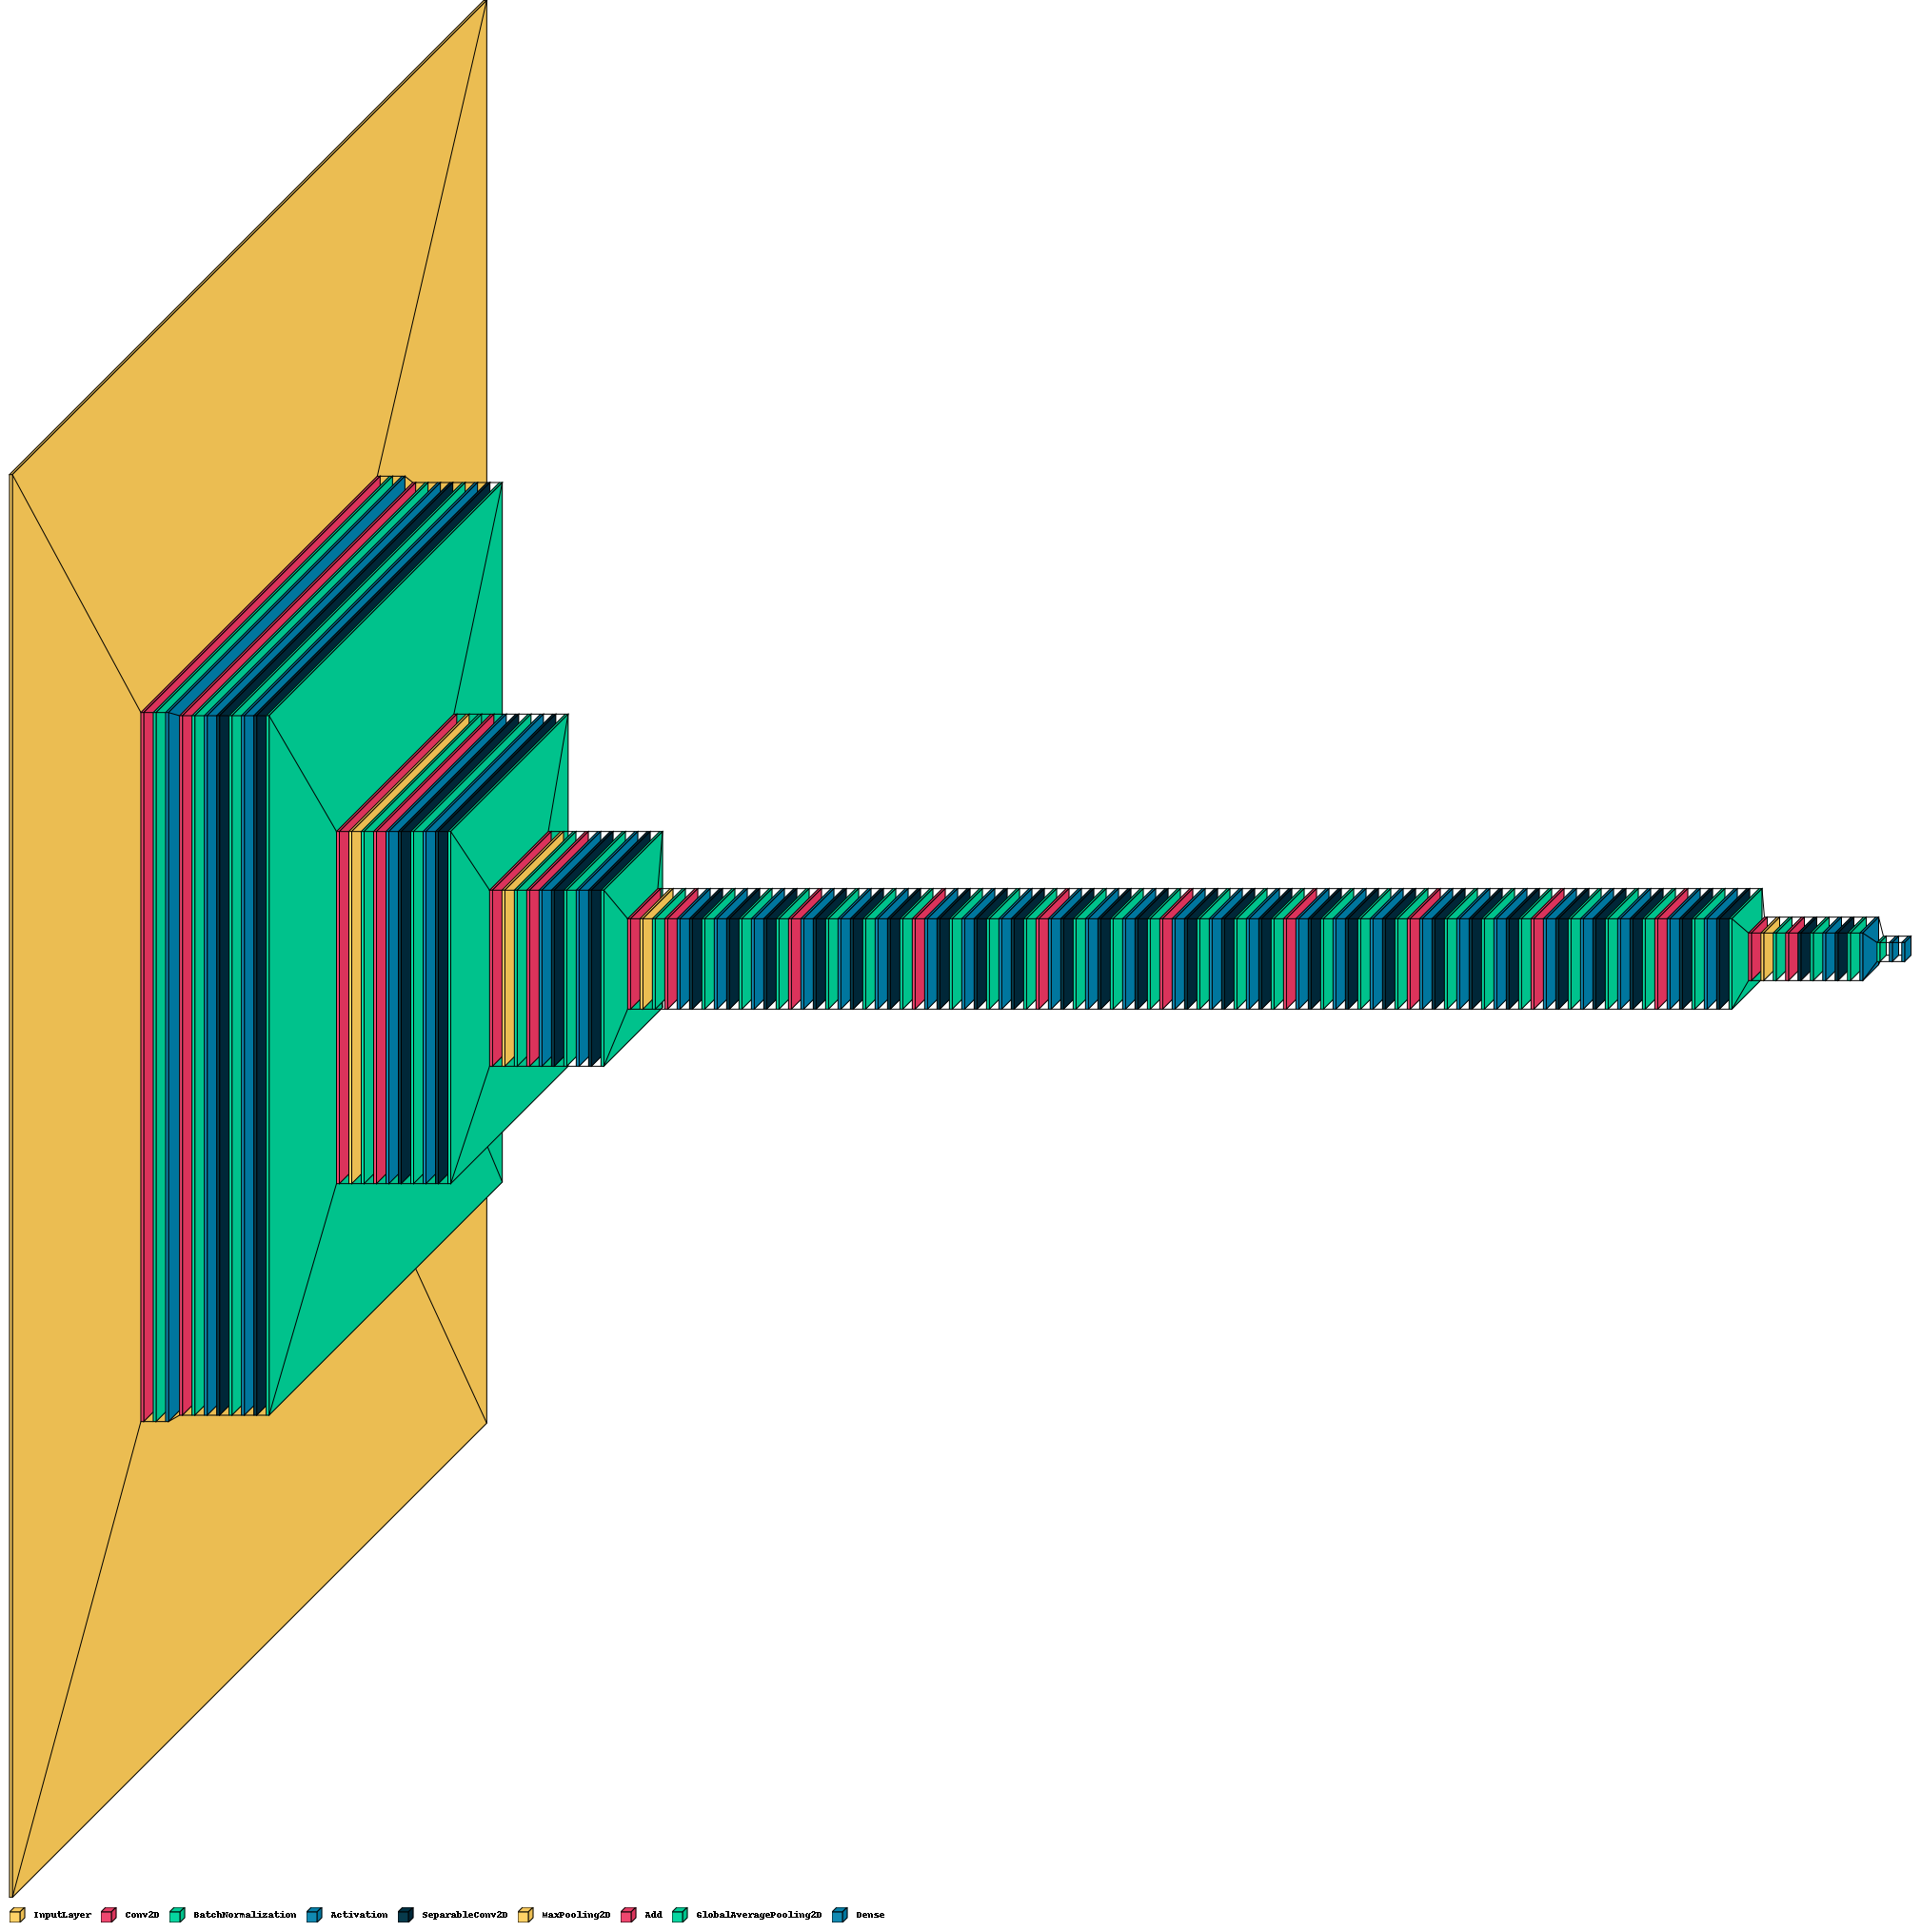

In [ ]:
model1=model
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model1, scale_xy=5, scale_z=3, max_z=3, legend=True)
#visualkeras.layered_view(model1, legend=True)

In [ ]:
# Set the checkpoint file path
checkpoint_filepath = '/content/drive/Shareddrives/MobileNetV2/VGG/best_Xception_model.h5'

In [ ]:
# Train the model with the train and validation generators
num_epochs = 10
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator)

Epoch 1/10
27/27 [==============================] - 481s 16s/step - loss: 0.4871 - accuracy: 0.7810 - val_loss: 1.7543 - val_accuracy: 0.9278
Epoch 2/10
27/27 [==============================] - 75s 3s/step - loss: 0.1894 - accuracy: 0.9369 - val_loss: 53.1447 - val_accuracy: 0.5000
Epoch 3/10
27/27 [==============================] - 77s 3s/step - loss: 0.2014 - accuracy: 0.9464 - val_loss: 1.1035 - val_accuracy: 0.8611
Epoch 4/10
27/27 [==============================] - 76s 3s/step - loss: 0.0943 - accuracy: 0.9714 - val_loss: 8.7582 - val_accuracy: 0.6111
Epoch 5/10
27/27 [==============================] - 77s 3s/step - loss: 0.0455 - accuracy: 0.9857 - val_loss: 1.1883 - val_accuracy: 0.8389
Epoch 6/10
27/27 [==============================] - 75s 3s/step - loss: 0.0309 - accuracy: 0.9917 - val_loss: 1.4274 - val_accuracy: 0.8944
Epoch 7/10
27/27 [==============================] - 76s 3s/step - loss: 0.0361 - accuracy: 0.9893 - val_loss: 4.8276 - val_accuracy: 0.5500
Epoch 8/10
27/27 

In [ ]:
# Evaluate the model on the test set
model.evaluate(test_generator)

6/6 [==============================] - 101s 20s/step - loss: 0.1887 - accuracy: 0.9556


[0.18867090344429016, 0.9555555582046509]

In [ ]:
# Evaluate the model on the validation set
validation_loss, validation_acc = model.evaluate(validation_generator)
print('Validation Loss:', validation_loss)
print('Validation Accuracy:', validation_acc)

6/6 [==============================] - 6s 891ms/step - loss: 0.3684 - accuracy: 0.9389
Validation Loss: 0.3684383034706116
Validation Accuracy: 0.9388889074325562


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

6/6 [==============================] - 7s 980ms/step - loss: 0.1887 - accuracy: 0.9556
Test Loss: 0.18867096304893494
Test Accuracy: 0.9555555582046509


In [ ]:
# Save the model
model.save(checkpoint_filepath)

In [ ]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model(checkpoint_filepath)
test_loss, test_acc = best_model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

6/6 [==============================] - 8s 1s/step - loss: 1.1943 - accuracy: 0.8556
Test accuracy: 0.855555534362793
